<h1>Preprocessing</h1>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Tuesday-WorkingHours.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Monday-WorkingHours.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Wednesday-workingHours.pcap_ISCX.csv
/kaggle/input/cic-ids-2017-gnn-2/df_properties.json
/kaggle/input/cic-ids-2017-gnn-2/cic_ids_2017.parquet
/kaggle/input/cic-ids-2017-gnn-2/labels_names.pkl
/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv
/kaggle/input/unsw-nb15/UNSW-NB15_1.csv
/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv
/kaggle/input/unsw

In [2]:
df_cic_iot=pd.read_parquet("/kaggle/input/cic-ton-iot-gnn/cic_ton_iot.parquet")

In [3]:
df_cic_iot.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
       'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s',
       'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std',
       'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt',
       'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count',
       'ECE Flag Cnt', 'Dow

In [4]:
import json

with open("/kaggle/input/cic-ton-iot-gnn/df_properties.json", "r") as f:
    df_properties = json.load(f)

print("📘 Dataset Properties:")
for k, v in df_properties.items():
    print(f"{k}: {v}")


📘 Dataset Properties:
name: cic_ton_iot
length: 5350583
num_benign: 2514059
percentage_of_benign_records: 46.98663678331875
num_attack: 2836524
percentage_of_attack_records: 53.01336321668125
attacks: ['Benign', 'mitm', 'scanning', 'dos', 'ddos', 'injection', 'password', 'backdoor', 'ransomware', 'xss']
weak_columns: ['Pkt Len Max', 'Bwd Seg Size Avg', 'Fwd Seg Size Avg', 'Fwd URG Flags', 'Bwd Pkt Len Max', 'Bwd URG Flags', 'Fwd Pkt Len Mean', 'Pkt Len Mean', 'FIN Flag Cnt', 'Bwd Header Len', 'Flow IAT Min', 'Tot Bwd Pkts', 'Flow Duration', 'Flow IAT Max', 'TotLen Bwd Pkts', 'Bwd Pkt Len Std', 'Active Std', 'Fwd Pkts/b Avg', 'Fwd Byts/b Avg', 'Fwd IAT Mean', 'Fwd Pkt Len Std', 'Pkt Len Var', 'Fwd Blk Rate Avg', 'Subflow Bwd Pkts', 'Pkt Len Std', 'CWE Flag Count', 'Bwd PSH Flags', 'Flow Pkts/s', 'URG Flag Cnt', 'Active Mean', 'Idle Mean', 'Bwd IAT Mean', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Tot', 'PSH Flag Cnt', 'Bwd Pkt Len Mean', 'Pkt Size Avg', 'Fwd Pkt Len Max']


In [5]:
import pickle

with open("/kaggle/input/cic-ton-iot-gnn/labels_names.pkl", "rb") as f:
    labels_names = pickle.load(f)
print(labels_names)
print("\n🏷️ Label Class Mapping:")
# for k, v in labels_names.items():
#     print(f"{k}: {v}")


[{0: 'Benign', 1: 'backdoor', 2: 'ddos', 3: 'dos', 4: 'injection', 5: 'mitm', 6: 'password', 7: 'ransomware', 8: 'scanning', 9: 'xss'}, array(['Benign', 'mitm', 'scanning', 'dos', 'ddos', 'injection',
       'password', 'backdoor', 'ransomware', 'xss'], dtype=object)]

🏷️ Label Class Mapping:


In [6]:
# Get the count of each class in the 'attack' column
class_counts = df_cic_iot['Attack'].value_counts()

# Print the counts for each class
print("Class counts:\n", class_counts)

# Compute the total sum of all counts
total_count = class_counts.sum()
print("\nTotal count of all classes:", total_count)


Class counts:
 Attack
Benign        2514059
xss           2149308
password       340208
injection      277696
scanning        36205
backdoor        27145
ransomware       5098
mitm              517
ddos              202
dos               145
Name: count, dtype: int64

Total count of all classes: 5350583


In [7]:
df_cic_iot['Attack'].value_counts()/len(df_cic_iot)

Attack
Benign        0.469866
xss           0.401696
password      0.063583
injection     0.051900
scanning      0.006767
backdoor      0.005073
ransomware    0.000953
mitm          0.000097
ddos          0.000038
dos           0.000027
Name: count, dtype: float64

In [8]:
df_cic_iot['Attack'].unique()

array(['Benign', 'mitm', 'scanning', 'dos', 'ddos', 'injection',
       'password', 'backdoor', 'ransomware', 'xss'], dtype=object)

In [9]:
df_cic_iot['Class'].unique()

array([0, 5, 8, 3, 2, 4, 6, 1, 7, 9])

In [10]:
# Select only numeric columns
numeric_cols = df_cic_iot.select_dtypes(include=['float64', 'int64']).columns

# Compute correlations with 'Attack_encoded'
correlations = df_cic_iot[numeric_cols].corrwith(df_cic_iot['Class'])

# Sort and display top correlated features
correlations = correlations.abs().sort_values(ascending=False)
print(correlations)

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Class               1.000000
Label               0.950248
Protocol            0.429762
Fwd Pkt Len Max     0.316851
Fwd Pkt Len Std     0.309742
                      ...   
URG Flag Cnt             NaN
Fwd Byts/b Avg           NaN
Fwd Pkts/b Avg           NaN
Fwd Blk Rate Avg         NaN
Subflow Bwd Pkts         NaN
Length: 78, dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


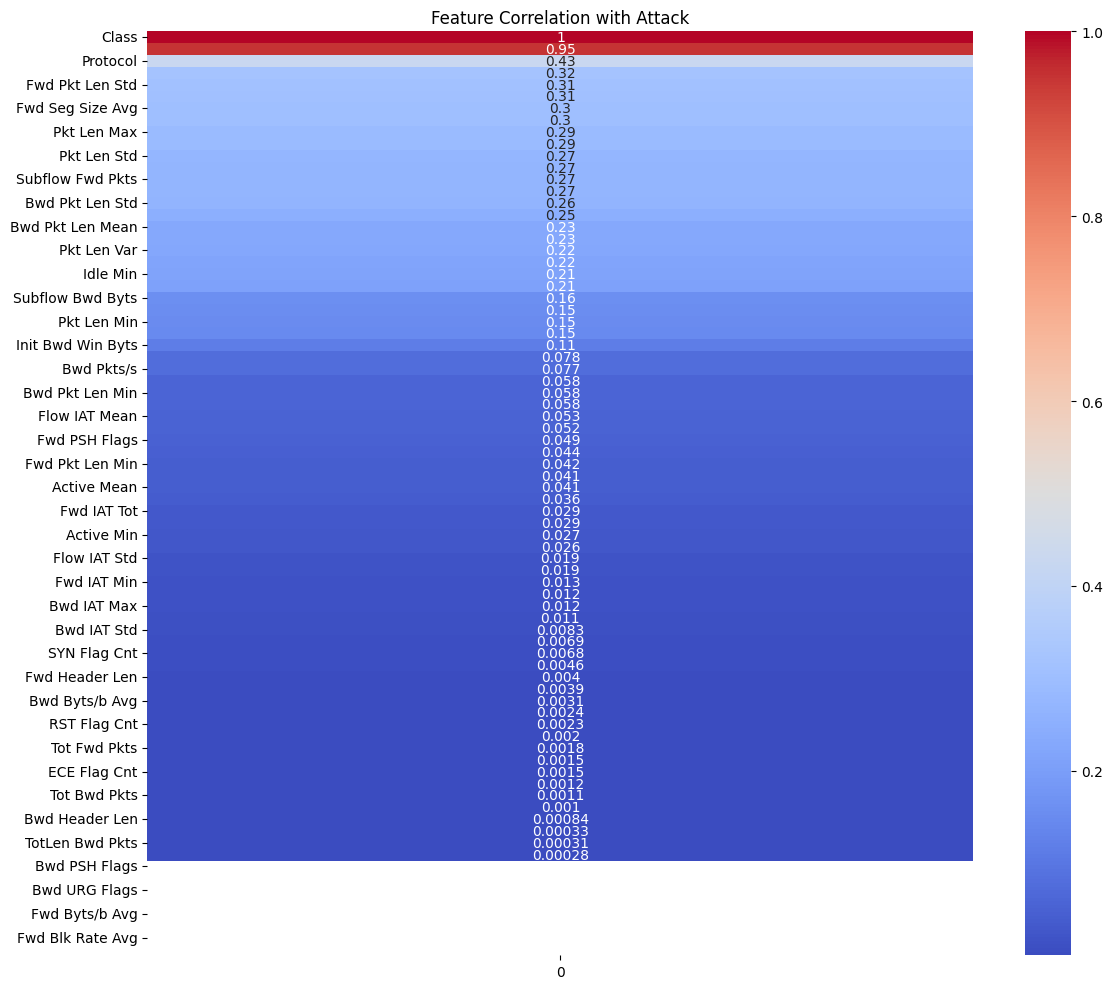

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Feature Correlation with Attack')
plt.tight_layout()
plt.show()

In [12]:
# cicd2017 = pd.read_csv('/kaggle/input/network-intrusion-dataset/Wednesday-workingHours.pcap_ISCX.csv')
# cicd2017.columns
# Fwd Pkts/b Avg           NaN


In [13]:
# cicd2017.shape

In [12]:
df_cic_iot.shape

(5350583, 85)

In [15]:
# cicd2017[' Label'].unique()

In [13]:
df_cic_iot.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
       'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s',
       'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std',
       'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt',
       'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count',
       'ECE Flag Cnt', 'Dow

In [14]:
print(correlations[-10:])

TotLen Bwd Pkts     0.000305
Bwd Pkts/b Avg      0.000282
Bwd PSH Flags            NaN
Fwd URG Flags            NaN
Bwd URG Flags            NaN
URG Flag Cnt             NaN
Fwd Byts/b Avg           NaN
Fwd Pkts/b Avg           NaN
Fwd Blk Rate Avg         NaN
Subflow Bwd Pkts         NaN
dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [15]:
df_cic_iot.head

<bound method NDFrame.head of          Flow ID           Src IP Src Port          Dst IP Dst Port  Protocol  \
0         179528    177.30.87.144      0.0     192.168.1.1      0.0       0.0   
1         111395    167.49.176.28      0.0  50.165.192.168      0.0       0.0   
2         987246    230.158.52.59      0.0  177.21.192.168      0.0       0.0   
3         230384   183.68.192.168      0.0     1.1.192.168      0.0       0.0   
4         230209   183.41.192.168      0.0     1.1.192.168      0.0       0.0   
...          ...              ...      ...             ...      ...       ...   
5351755  1173912    96.49.192.168      0.0     1.30.18.184      0.0       0.0   
5351756  1113832   57.157.192.168      0.0    1.30.192.168      0.0       0.0   
5351757   230222   183.43.192.168      0.0     1.1.192.168      0.0       0.0   
5351758   931956  193.129.192.168      0.0   1.195.192.168      0.0       0.0   
5351759    89365   153.12.192.168      0.0   1.152.192.168      0.0       0.0  

In [16]:
df_cic_iot.drop(columns='Label', inplace=True)


In [17]:
df_cic_iot.drop(columns='Attack', inplace=True)

In [21]:
df_cic_iot.drop(columns='Bwd Blk Rate Avg', inplace=True)
df_cic_iot.drop(columns='Fwd Blk Rate Avg', inplace=True)
df_cic_iot.drop(columns='Bwd Pkts/b Avg', inplace=True)
df_cic_iot.drop(columns='Bwd Byts/b Avg', inplace=True)

In [22]:
df_cic_iot.shape

(2286203, 79)

In [23]:
df_cic_iot.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
       'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s',
       'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std',
       'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt',
       'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count',
       'ECE Flag Cnt', 'Dow

<h3>Preparing Data</h3>

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

def preprocess_data(dataframe):
    # Ensure the input is a DataFrame
    df = pd.DataFrame(dataframe)

    # Separate numeric and categorical columns
    numeric_cols = df.select_dtypes(include=["number"]).columns
    categorical_cols = df.select_dtypes(exclude=["number"]).columns

    # # Replace infinite values with NaN
    df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan)

    # # Handle missing values for numeric columns
    # if not numeric_cols.empty:
    #     num_imputer = SimpleImputer(strategy="mean")
    #     df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

    # Drop rows with missing values
    df = df.dropna(subset=numeric_cols)  # Drop rows where any numeric column has NaN
    df = df.dropna(subset=categorical_cols)  # Drop rows where any categorical column has NaN

    # Handle missing values for categorical columns (if present)
    if not categorical_cols.empty:
        # Fill missing values
        # cat_imputer = SimpleImputer(strategy="most_frequent")
        # df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

        # Convert categorical columns to strings for uniformity
        df[categorical_cols] = df[categorical_cols].astype(str)

        # Encode categorical features
        label_encoders = {}
        for col in categorical_cols:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            label_encoders[col] = le  # Save encoder for inverse transformations

    # Return the preprocessed DataFrame and optional encoders
    return df


<h3>Metrics Calculations</h3>

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_roc_curve_multi_class(test_y, probas, class_names):
    """
    Plots a single ROC curve for multi-class classification by averaging probabilities.

    Args:
    - test_y: True labels (array-like), shape (n_samples,)
    - probas: Predicted probabilities, shape (n_samples, n_classes)
    - class_names: List of class names (or labels)
    """
    # Binarize the true labels for multi-class
    lb = label_binarize(test_y, classes=range(len(class_names)))  # shape: (n_samples, n_classes)

    # Compute ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(lb[:, i], probas[:, i])  # Compute for each class
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(lb.ravel(), probas.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and AUC
    # Aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(class_names))]))

    # Interpolate all ROC curves
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(len(class_names)):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Average and compute AUC
    mean_tpr /= len(class_names)
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(8, 6))
    plt.plot(
        fpr["micro"], tpr["micro"],
        label=f"Micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
        color='deeppink', linestyle=':', linewidth=1,
    )

    plt.plot(
        fpr["macro"], tpr["macro"],
        label=f"Macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
        color='navy', linestyle='-', linewidth=1,
    )

    for i, class_name in enumerate(class_names):
        plt.plot(
            fpr[i], tpr[i], lw=1,
            label=f"ROC curve of class {class_name} (AUC = {roc_auc[i]:.2f})"
        )

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

In [26]:
!pip install torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.2.0+cpu.html
!pip install torch-geometric

import torch
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch_geometric.data import Data
from torch_geometric.nn import GATConv
import torch.nn.functional as F

Looking in links: https://data.pyg.org/whl/torch-2.2.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 kB 8.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.6/776.6 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.8/215.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.0 MB/s eta 0:00:00a 0:00:01


/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cpu.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_cluster/_version_cpu.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_spline_conv/_version_cpu.so: undefined symbol: _ZN5t

<h1>Training</h1>

<h2>Creating Graph</h2>

In [27]:
# Step 2: Convert to Graph Data
def create_graph(X, y, k):
    """
    Converts tabular data into a graph format using k-NN.

    Args:
        X (np.ndarray or pd.DataFrame): Feature matrix.
        y (pd.Series or np.ndarray): Labels.
        k (int): Number of neighbors for k-NN graph.

    Returns:
        Data: A PyTorch Geometric Data object.
    """
    # Ensure X and y are NumPy arrays
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values

    # Create k-NN graph
    adj = kneighbors_graph(X, k, mode='connectivity', include_self=False)
    adj = (adj + adj.T).astype(bool).astype(int)  # Make undirected
    edge_index = torch.tensor(adj.nonzero(), dtype=torch.long)

    # Convert features and labels to tensors
    features = torch.tensor(X, dtype=torch.float)
    labels = torch.tensor(y, dtype=torch.long)

    return Data(x=features, edge_index=edge_index, y=labels)

def adaptive_graph_construction(X, y, adaptive_metric='euclidean', threshold=0.5):
    """
    Adaptive graph construction based on feature similarity or domain knowledge.

    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Labels.
        adaptive_metric (str): Metric for feature similarity ('euclidean', 'cosine', etc.).
        threshold (float): Threshold for edge creation based on similarity.

    Returns:
        Data: PyTorch Geometric Data object.
    """
    from sklearn.metrics.pairwise import pairwise_distances

    # Calculate pairwise distances
    distances = pairwise_distances(X, metric=adaptive_metric)

    # Create adjacency matrix based on threshold
    adj = (distances < threshold).astype(int)

    adj = kneighbors_graph(X, 20, metric='euclidean').toarray() * adj  # Intersection

    # Convert to edge index
    edge_index = torch.tensor(adj.nonzero(), dtype=torch.long)
    features = torch.tensor(X, dtype=torch.float)
    labels = torch.tensor(y, dtype=torch.long)

    return Data(x=features, edge_index=edge_index, y=labels)

def augment_graph(data, edge_perturbation_rate=0.1, feature_mask_rate=0.2):
    """
    Graph augmentation with edge perturbation and feature masking.

    Args:
        data (Data): PyTorch Geometric Data object.
        edge_perturbation_rate (float): Proportion of edges to perturb.
        feature_mask_rate (float): Proportion of features to mask.

    Returns:
        Data: Augmented PyTorch Geometric Data object.
    """
    # Edge perturbation
    num_edges = data.edge_index.size(1)
    num_perturb = int(edge_perturbation_rate * num_edges)
    random_indices = torch.randint(0, num_edges, (num_perturb,))
    data.edge_index = torch.cat([data.edge_index[:, random_indices], data.edge_index], dim=1)

    # Feature masking
    num_features = data.x.size(1)
    num_mask = int(feature_mask_rate * num_features)
    random_features = torch.randint(0, num_features, (num_mask,))
    data.x[:, random_features] = 0  # Mask features by setting them to 0

    return data


<h2>Standard models</h2>

In [28]:
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import SVC, OneClassSVM
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, GATConv, GraphSAGE
from torch.optim import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import time
import tracemalloc
from torch.optim import Adam
from torch.nn import Module

from torch_geometric.nn import (
    GCNConv, GATConv, GraphSAGE, TransformerConv,
    CGConv, GINConv, PANConv, FiLMConv,
    SuperGATConv, ClusterGCNConv, ARMAConv, DNAConv,
    global_add_pool, global_mean_pool
)
from torch_geometric.data import Data, DataLoader
from torch_geometric.utils import dropout_adj, to_dense_adj
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score

# -----------------------------
# Additional GNN Model Classes
# -----------------------------

class GIN(torch.nn.Module):
    """Graph Isomorphism Network with 3 GINConv layers"""
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        super(GIN, self).__init__()
        print("Graph Isomorphism Network with 3 GINConv layers")
        nn1 = torch.nn.Sequential(
            torch.nn.Linear(input_dim, hidden_dim),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_dim, hidden_dim)
        )
        self.conv1 = GINConv(nn1)
        nn2 = torch.nn.Sequential(
            torch.nn.Linear(hidden_dim, hidden_dim),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_dim, hidden_dim)
        )
        self.conv2 = GINConv(nn2)
        self.conv3 = GINConv(torch.nn.Linear(hidden_dim, output_dim))

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        return self.conv3(x, edge_index).squeeze()


class SuperGAT(torch.nn.Module):
    """SuperGAT with 3 attention layers"""
    def __init__(self, input_dim, hidden_dim, output_dim=1, heads=2):
        super(SuperGAT, self).__init__()
        print("SuperGAT with 3 attention layers")        
        self.conv1 = SuperGATConv(input_dim, hidden_dim, heads=heads)
        self.conv2 = SuperGATConv(hidden_dim*heads, hidden_dim, heads=1)
        self.conv3 = SuperGATConv(hidden_dim, output_dim, heads=1)

    def forward(self, x, edge_index):
        x = F.elu(self.conv1(x, edge_index))
        x = F.elu(self.conv2(x, edge_index))
        return self.conv3(x, edge_index).squeeze()

class ClusterGCN(torch.nn.Module):
    """Cluster-GCN with 3 convolutional layers"""
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        super(ClusterGCN, self).__init__()
        print("Cluster-GCN with 3 convolutional layers")
        self.conv1 = ClusterGCNConv(input_dim, hidden_dim)
        self.conv2 = ClusterGCNConv(hidden_dim, hidden_dim)
        self.conv3 = ClusterGCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        return self.conv3(x, edge_index).squeeze()

class ARMA(torch.nn.Module):
    """ARMA model with 3 convolutional layers"""
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        super(ARMA, self).__init__()
        print("ARMA model with 3 convolutional layers")
        self.conv1 = ARMAConv(input_dim, hidden_dim, num_stacks=3, num_layers=2)
        self.conv2 = ARMAConv(hidden_dim, hidden_dim, num_stacks=3, num_layers=2)
        self.conv3 = ARMAConv(hidden_dim, output_dim, num_stacks=3, num_layers=2)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        return self.conv3(x, edge_index).squeeze()

class HybridGNN(torch.nn.Module):
    """Combines features from different architectures"""
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        super(HybridGNN, self).__init__()
        print("Combines features from different architectures")
        self.gat = GATConv(input_dim, hidden_dim)
        self.sage = GraphSAGE(hidden_dim, hidden_dim)
        self.arma = ARMAConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = F.elu(self.gat(x, edge_index))
        x = F.elu(self.sage(x, edge_index))
        return self.arma(x, edge_index).squeeze()

# -----------------------------
# Standardized GCN Model
# -----------------------------
class GCN(torch.nn.Module):
    """Three-layer Graph Convolutional Network"""
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        super(GCN, self).__init__()
        print("Three-layer Graph Convolutional Network")
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.conv3 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        return self.conv3(x, edge_index).squeeze()

# -----------------------------
# Standardized GAT Model
# -----------------------------
class GAT(torch.nn.Module):
    """Three-layer Graph Attention Network"""
    def __init__(self, input_dim, hidden_dim, output_dim=1, heads=4):
        super(GAT, self).__init__()
        print("Three-layer Graph Attention Network")
        self.conv1 = GATConv(input_dim, hidden_dim, heads=heads)
        self.conv2 = GATConv(hidden_dim*heads, hidden_dim, heads=1)
        self.conv3 = GATConv(hidden_dim, output_dim, heads=1)

    def forward(self, x, edge_index):
        x = F.elu(self.conv1(x, edge_index))
        x = F.elu(self.conv2(x, edge_index))
        return self.conv3(x, edge_index).squeeze()

class CAGN_GAT_Fusion(torch.nn.Module):
    """Hybrid of CAGN and GAT components"""
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        super(CAGN_GAT_Fusion, self).__init__()
        print("Hybrid of CAGN and GAT components")
        self.cagn_conv1 = GATConv(input_dim, hidden_dim, heads=8)
        self.gat_conv2 = GATConv(hidden_dim*8, hidden_dim, heads=4)
        self.final_conv = GATConv(hidden_dim*4, output_dim, heads=1)

    def forward(self, x, edge_index):
        x = F.relu(self.cagn_conv1(x, edge_index))
        x = F.elu(self.gat_conv2(x, edge_index))
        return self.final_conv(x, edge_index).squeeze()

<h2>Novel Model</h2>

In [29]:
import numpy as np
import pandas as pd
# Import necessary libraries for the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier
import torch
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import SVC, OneClassSVM
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, GATConv, GraphSAGE
from torch.optim import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import time
import tracemalloc
import torch
import torch.nn.functional as F
from torch.optim import Adam
from torch.nn import Module

# -----------------------------
# Novel GNN Model: CAGN (Contrastive Attentive Graph Network)
# -----------------------------
class CAGN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, heads=8):
        super(CAGN, self).__init__()
        self.conv1 = GATConv(input_dim, hidden_dim, heads=heads)
        self.conv2 = GATConv(hidden_dim * heads, hidden_dim, heads=1)
        self.conv3 = GATConv(hidden_dim, output_dim, heads=1)
        self.contrastive_loss_weight = 0.5  # Hyperparameter

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = self.conv3(x, edge_index)
        return F.log_softmax(x, dim=1)

    def contrastive_loss(self, z, labels, margin=1.0):
        # Simplified contrastive loss: Pull same-class nodes closer, push others apart
        norm_z = F.normalize(z, p=2, dim=1)
        sim_matrix = torch.mm(norm_z, norm_z.t())  # Cosine similarity
        pos_mask = (labels.unsqueeze(1) == labels.unsqueeze(0)).float()
        neg_mask = 1 - pos_mask
        pos_loss = (1 - sim_matrix) * pos_mask
        neg_loss = F.relu(sim_matrix - margin) * neg_mask
        return (pos_loss + neg_loss).mean()


    def train_model(self, data, epochs=300, lr=0.001):
        optimizer = Adam(self.parameters(), lr=lr)
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)
        self.train()
        for epoch in range(epochs):
            optimizer.zero_grad()
            out = self(data.x, data.edge_index)
            class_names = train_y.unique()
            if len(class_names) == 2:
                cls_loss = F.binary_cross_entropy_with_logits(out[data.train_mask].squeeze(), data.y[data.train_mask].float())
            else:
                cls_loss = F.cross_entropy(out[data.train_mask].squeeze(), data.y[data.train_mask].long())
            contrast_loss = self.contrastive_loss(out, data.y)
            total_loss = cls_loss + self.contrastive_loss_weight * contrast_loss
            total_loss.backward()
            optimizer.step()
            scheduler.step()
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {total_loss.item()}")


# Novel GNN Model: Multi-Scale Hierarchical GAT with Contrastive Learning

class MultiScaleGAT(Module):
    def __init__(self, input_dim, hidden_dim, output_dim=1):
        """
        Multi-Scale Hierarchical GAT with Contrastive Learning.

        Args:
            input_dim (int): Input feature dimension.
            hidden_dim (int): Hidden layer dimension.
            output_dim (int): Output dimension (1 for binary classification).
        """
        super(MultiScaleGAT, self).__init__()
        self.gat1 = GATConv(input_dim, hidden_dim, heads=4, concat=True)
        self.gat2 = GATConv(hidden_dim * 4, hidden_dim, heads=2, concat=False)
        self.gat3 = GraphSAGE(in_channels=hidden_dim, hidden_channels=128, out_channels=hidden_dim, num_layers=2)
        self.contrastive_proj = torch.nn.Linear(hidden_dim, hidden_dim)
        self.classifier = torch.nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x, edge_index):
        """
        Forward pass for the model.

        Args:
            x (torch.Tensor): Node feature matrix.
            edge_index (torch.Tensor): Graph edge indices.

        Returns:
            torch.Tensor: Output logits.
        """
        x1 = F.leaky_relu(self.gat1(x, edge_index))
        x2 = F.leaky_relu(self.gat2(x1, edge_index))
        x3 = F.leaky_relu(self.gat3(x2, edge_index))
        x_combined = torch.cat([x2, x3], dim=1)  # Combine multi-scale features
        return self.classifier(x_combined)  # Return raw logits (no sigmoid here)

    def contrastive_loss(self, z, margin=2.0):
        """
        Contrastive loss to separate normal and attack nodes.

        Args:
            z (torch.Tensor): Node embeddings.
            margin (float): Margin for contrastive loss.

        Returns:
            torch.Tensor: Contrastive loss value.
        """
        norm_z = F.normalize(z, p=2, dim=1)
        sim_matrix = torch.mm(norm_z, norm_z.t())  # Cosine similarity
        y = self.data.y
        pos_mask = (y.unsqueeze(1) == y.unsqueeze(0)).float()
        neg_mask = 1 - pos_mask
        pos_loss = (1 - sim_matrix) * pos_mask
        neg_loss = F.relu(sim_matrix - margin) * neg_mask
        return (pos_loss + neg_loss).mean()

    def train_model(self, data, epochs=300, lr=0.001, class_weight=None):
        """
        Train the MultiScaleGAT model.

        Args:
            data (torch_geometric.data.Data): Graph data object.
            epochs (int): Number of training epochs.
            lr (float): Learning rate.
            class_weight (float): Weight for the positive class (optional).
        """
        self.data = data  # Store data for contrastive loss
        optimizer = Adam(self.parameters(), lr=lr)
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)
        self.train()

        for epoch in range(epochs):
            optimizer.zero_grad()

            # Forward pass
            out = self(data.x, data.edge_index)
            logits = out[data.train_mask].squeeze()
            labels = data.y[data.train_mask]

            # Classification loss
            pos_weight = torch.tensor([class_weight]) if class_weight else None

            if len(labels.unique()) == 2:
                cls_loss = F.binary_cross_entropy_with_logits(logits, labels.float(), pos_weight=pos_weight)
            else:
                cls_loss = F.cross_entropy(logits, labels.long(), weight=pos_weight)

            # Contrastive loss
            z = self.contrastive_proj(
                self.gat3(self.gat2(self.gat1(data.x, data.edge_index), data.edge_index), data.edge_index)
            )
            contrast_loss = self.contrastive_loss(z)

            # Total loss
            total_loss = cls_loss + 0.5 * contrast_loss
            total_loss.backward()
            optimizer.step()
            scheduler.step()

            # Print loss every 10 epochs
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Total Loss: {total_loss.item():.4f}, CLS Loss: {cls_loss.item():.4f}, Contrastive Loss: {contrast_loss.item():.4f}")



# -----------------------------
# Benchmarking Function
# -----------------------------
def run_all_benchmarks(train_X, test_X, train_y, test_y, train_graph, test_graph, k=10):
    # Step 3: Train All Models
    results = []
    all_auc_curves = {}
    X_train, X_test, y_train, y_test = train_X, test_X, train_y, test_y
    class_names = y_train.unique()

    lb = LabelBinarizer()
    lb.fit(train_y)  # Fit LabelBinarizer to handle multi-class scenario
    # ----------
    # Traditional Models
    # ----------
    # if len(class_names) == 2:  # Binary classification
    #     models = {
    #         "LR": LogisticRegression(),
    #         "DT": DecisionTreeClassifier(),
    #         "NN": MLPClassifier(max_iter=300),
    #         "SVM": SVC(probability=True),
    #         "RF": RandomForestClassifier(),
    #         "XGBoost": XGBClassifier(),
    #         "GB": GradientBoostingClassifier(),
    #     }
    # else:
    #     models = {
    #         "LR": LogisticRegression(),
    #         "DT": DecisionTreeClassifier(),
    #         "NN": MLPClassifier(max_iter=300),
    #         "RF": RandomForestClassifier(),
    #         "SVM": SVC(probability=True, decision_function_shape='ovr'),  # Adding 'ovr' for multi-class
    #         "XGBoost": XGBClassifier(),
    #         "GB": GradientBoostingClassifier(),
    #     }

    # for name, model in models.items():
    #     print(f"Training {name}...")
    #     tracemalloc.start()
    #     start_time = time.time()

    #     model.fit(X_train, y_train)
    #     probas = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    #     pred = model.predict(X_test)

    #     # Metrics
    #     accuracy = accuracy_score(y_test, pred)
    #     precision = precision_score(y_test, pred, average='macro')
    #     recall = recall_score(y_test, pred, average='macro')
    #     f1 = f1_score(y_test, pred, average='macro')
    #     report = classification_report(y_test, pred, output_dict=True)
    #     confusion = confusion_matrix(y_test, pred)

    #     # AUC-ROC (Handling both binary and multi-class cases)
    #     auc = None
    #     if probas is not None:
    #         if len(class_names) == 2:  # Binary classification
    #             auc = roc_auc_score(test_y, probas[:, 1])  # Use the positive class probabilities
    #             fpr, tpr, _ = roc_curve(test_y, probas[:, 1])
    #             all_auc_curves[name] = (fpr, tpr, auc)
    #         else:  # Multi-class classification
    #             auc = roc_auc_score(test_y, probas, multi_class='ovr', average='macro')  # Use One-vs-Rest for multi-class
    #             # Calculate ROC for each class
    #             fpr_dict, tpr_dict, auc_dict = {}, {}, {}
    #             for i in range(len(class_names)):
    #                 fpr_dict[i], tpr_dict[i], _ = roc_curve(lb.transform(test_y)[:, i], probas[:, i])
    #                 auc_dict[i] = roc_auc_score(lb.transform(test_y)[:, i], probas[:, i])
    #             all_auc_curves[name] = (fpr_dict, tpr_dict, auc_dict)

    #     end_time = time.time()
    #     mem_consumption = tracemalloc.get_traced_memory()[1]
    #     tracemalloc.stop()

    #     results.append({
    #         "Model": name,
    #         "Accuracy": accuracy,
    #         "AUC": auc,
    #         "Precision": precision,
    #         "Recall": recall,
    #         "F1": f1,
    #         "Classification Report": report,
    #         "Confusion Matrix": confusion,
    #         "Time (s)": f"{end_time - start_time:.2f} s",
    #         "Memory (MB)": f"{mem_consumption / 1e6:.2f} MB"
    #     })

    # ----------
    # Graph Models (GCN, GAT, GraphSAGE, CAGN)
    # ----------
    input_dim = train_graph.x.shape[1]
    output_dim = 1 if len(train_graph.y.unique()) == 2 else len(train_graph.y.unique())

    gnn_models = {
        "GCN": GCN(input_dim, hidden_dim=64, output_dim=output_dim),
        "GAT": GAT(input_dim, hidden_dim=64, output_dim=output_dim, heads=4),
        "CAGN_GAT_Fusion": CAGN_GAT_Fusion(input_dim, hidden_dim=64, output_dim=output_dim),
        "GraphSAGE": GraphSAGE(in_channels=input_dim, hidden_channels=64, out_channels=output_dim, num_layers=3),
        "GIN": GIN(input_dim, hidden_dim=64, output_dim=output_dim),
        "SuperGAT": SuperGAT(input_dim, hidden_dim=64, output_dim=output_dim),
        "ClusterGCN": ClusterGCN(input_dim, hidden_dim=64, output_dim=output_dim),
        "ARMA": ARMA(input_dim, hidden_dim=64, output_dim=output_dim),
        "MultiScaleGAT": MultiScaleGAT(input_dim, hidden_dim=64, output_dim=output_dim),
        "CAGN": CAGN(input_dim, hidden_dim=64, output_dim=output_dim, heads=4)
    }

    for name, model in gnn_models.items():
        os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
        import gc

        gc.collect()
        torch.cuda.empty_cache()
        print(f"Training {name}...")
        model = model.to(device)  # Move model to GPU
        tracemalloc.start()
        start_time = time.time()
        if name in ["MultiScaleGAT", "CAGN"]:
            model.train_model(train_graph)
            model.eval()
            with torch.no_grad():
                out = model(test_graph.x, test_graph.edge_index)

                # if len(class_names) == 2:  # Binary classification
                #     pred = torch.sigmoid(out).cpu().numpy()  # Move to CPU before conversion
                #     pred = (pred > 0.5).astype(int)  # Threshold at 0.5
                # else:  # Multi-class classification
                #     pred = torch.softmax(out, dim=1).argmax(dim=1).cpu().numpy()  # Move to CPU before conversion

                if len(class_names) == 2:  # Binary classification
                    probas = torch.sigmoid(out).cpu().numpy()
                    pred = (probas > 0.5).astype(int)
                else:  # Multi-class classification
                    probas = torch.softmax(out, dim=1).cpu().numpy()
                    pred = np.argmax(probas, axis=1)
                    
            accuracy = accuracy_score(y_test, pred)
            precision = precision_score(y_test, pred, average='macro')
            recall = recall_score(y_test, pred, average='macro')
            f1 = f1_score(y_test, pred, average='macro')
            report = classification_report(y_test, pred, output_dict=True)
            confusion = confusion_matrix(y_test, pred)
            # auc = roc_auc_score(y_test, probas)

            # AUC-ROC (Handling both binary and multi-class cases)
            if len(class_names) == 2:  # Binary classification
                auc = roc_auc_score(test_y, probas[:, 1])  # Use the positive class probabilities
                fpr, tpr, _ = roc_curve(test_y, probas[:, 1])
                all_auc_curves[name] = (fpr, tpr, auc)
            else:  # Multi-class classification
                # all_classes = list(range(15))  # full class list
                # present_classes = np.unique(train_y)  # classes model trained on
                
                # # Step 1: Initialize full probas matrix with zeros
                # full_probas = np.zeros((probas.shape[0], len(all_classes)))
                
                # # Step 2: Map present classes into the correct column positions
                # for i, cls in enumerate(present_classes):
                #     class_idx = all_classes.index(cls)  # Get correct column position
                #     full_probas[:, class_idx] = probas[:, i]
                
                # # Step 3: Binarize test_y with all 15 classes
                # test_y_bin = label_binarize(test_y, classes=all_classes)
                
                # # Step 4: Compute AUC (macro over all classes)
                # auc = roc_auc_score(test_y_bin, full_probas, average='macro', multi_class='ovr')
                auc = roc_auc_score(test_y, probas, multi_class='ovr', average='macro')  # Use One-vs-Rest for multi-class
                # Calculate ROC for each class
                fpr_dict, tpr_dict, auc_dict = {}, {}, {}
                for i in range(len(class_names)):
                    fpr_dict[i], tpr_dict[i], _ = roc_curve(lb.transform(test_y)[:, i], probas[:, i])
                    auc_dict[i] = roc_auc_score(lb.transform(test_y)[:, i], probas[:, i])
                all_auc_curves[name] = (fpr_dict, tpr_dict, auc_dict)

            end_time = time.time()
            mem_consumption = tracemalloc.get_traced_memory()[1]
            tracemalloc.stop()

            results.append({
                "Model": name,
                "Accuracy": accuracy,
                "AUC": auc,
                "Precision": precision,
                "Recall": recall,
                "F1": f1,
                "Classification Report": report,
                "Confusion Matrix": confusion,
                "Time (s)": f"{end_time - start_time:.2f} s",
                "Memory (MB)": f"{mem_consumption / 1e6:.2f} MB"
            })

        else:
            optimizer = Adam(model.parameters(), lr=0.001)
            scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)
            model.train()
            for epoch in range(300):
                optimizer.zero_grad()
                out = model(train_graph.x, train_graph.edge_index)
                if len(class_names) == 2:
                    loss = F.binary_cross_entropy_with_logits(out[train_graph.train_mask].squeeze(), train_graph.y[train_graph.train_mask].float())
                else:
                    loss = F.cross_entropy(out[train_graph.train_mask].squeeze(), train_graph.y[train_graph.train_mask].long())

                loss.backward()
                optimizer.step()
                scheduler.step()

            # Evaluation
            model.eval()
            with torch.no_grad():
                out = model(test_graph.x, test_graph.edge_index)

                # if len(class_names) == 2:  # Binary classification
                #     pred = torch.sigmoid(out).cpu().numpy()  # Move to CPU before conversion
                #     pred = (pred > 0.5).astype(int)  # Threshold at 0.5
                # else:  # Multi-class classification
                #     pred = torch.softmax(out, dim=1).argmax(dim=1).cpu().numpy()  # Move to CPU before conversion
                if len(class_names) == 2:  # Binary classification
                    probas = torch.sigmoid(out).cpu().numpy()
                    pred = (probas > 0.5).astype(int)
                else:  # Multi-class classification
                    probas = torch.softmax(out, dim=1).cpu().numpy()
                    pred = np.argmax(probas, axis=1)
                print(probas)
                    
            accuracy = accuracy_score(y_test, pred)
            precision = precision_score(y_test, pred, average='macro')
            recall = recall_score(y_test, pred, average='macro')
            f1 = f1_score(y_test, pred, average='macro')
            report = classification_report(y_test, pred, output_dict=True)
            confusion = confusion_matrix(y_test, pred)
            # auc = roc_auc_score(y_test, probas)

            # AUC-ROC (Handling both binary and multi-class cases)
            if len(class_names) == 2:  # Binary classification
                auc = roc_auc_score(test_y, probas[:, 1])  # Use the positive class probabilities
                fpr, tpr, _ = roc_curve(test_y, probas[:, 1])
                all_auc_curves[name] = (fpr, tpr, auc)
            else:  # Multi-class classification
                # all_classes = list(range(15))  # full class list
                # present_classes = np.unique(train_y)  # classes model trained on
                
                # # Step 1: Initialize full probas matrix with zeros
                # full_probas = np.zeros((probas.shape[0], len(all_classes)))
                
                # # Step 2: Map present classes into the correct column positions
                # for i, cls in enumerate(present_classes):
                #     class_idx = all_classes.index(cls)  # Get correct column position
                #     full_probas[:, class_idx] = probas[:, i]
                
                # # Step 3: Binarize test_y with all 15 classes
                # test_y_bin = label_binarize(test_y, classes=all_classes)
                
                # # Step 4: Compute AUC (macro over all classes)
                # auc = roc_auc_score(test_y_bin, full_probas, average='macro', multi_class='ovr')
                auc = roc_auc_score(test_y, probas, multi_class='ovr', average='macro')  # Use One-vs-Rest for multi-class
                # Calculate ROC for each class
                fpr_dict, tpr_dict, auc_dict = {}, {}, {}
                for i in range(len(class_names)):
                    fpr_dict[i], tpr_dict[i], _ = roc_curve(lb.transform(test_y)[:, i], probas[:, i])
                    auc_dict[i] = roc_auc_score(lb.transform(test_y)[:, i], probas[:, i])
                all_auc_curves[name] = (fpr_dict, tpr_dict, auc_dict)

            end_time = time.time()
            mem_consumption = tracemalloc.get_traced_memory()[1]
            tracemalloc.stop()

            results.append({
                "Model": name,
                "Accuracy": accuracy,
                "AUC": auc,
                "Precision": precision,
                "Recall": recall,
                "F1": f1,
                "Classification Report": report,
                "Confusion Matrix": confusion,
                "Time (s)": f"{end_time - start_time:.2f} s",
                "Memory (MB)": f"{mem_consumption / 1e6:.2f} MB"
            })


    # ----------
    # Generate Results Table
    # ----------
    # Generate Results Table
    results_df = pd.DataFrame(results).drop(columns=["Classification Report", "Confusion Matrix"])
    results_df = results_df.sort_values("Accuracy", ascending=False)
    print("\nBenchmark Results:")
    print(results_df.to_markdown(index=False))

    # if len(class_names) == 2:  # Binary classification
    #     # Plot AUC-ROC curves
    #     plt.figure(figsize=(10, 8))
    #     for model_name, (fpr, tpr, auc) in all_auc_curves.items():
    #         plt.plot(fpr, tpr, label=f"{model_name} (AUC={auc:.2f})")
    #     plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    #     plt.xlabel("False Positive Rate")
    #     plt.ylabel("True Positive Rate")
    #     plt.title("AUC-ROC Curves")
    #     plt.legend()
    #     plt.grid()
    #     plt.savefig("auc_roc_curves.png")
    #     plt.show()
    # else:
    #     plot_roc_curve_multi_class(test_y, probas, class_names)

    # Plot Confusion Matrices as Percentages with % Sign
    # for result in results:
    #     model_name = result["Model"]
    #     confusion = result["Confusion Matrix"]

    #     # Normalize the confusion matrix to percentages (row-wise)
    #     row_sums = confusion.sum(axis=1, keepdims=True)
    #     confusion_percentage = (confusion / row_sums) * 100

    #     # Create annotations with the '%' sign
    #     annotations = np.array([
    #         [f"{value:.2f}%" for value in row] for row in confusion_percentage
    #     ])

    #     plt.figure(figsize=(8, 6))
    #     sns.heatmap(
    #         confusion_percentage,
    #         annot=annotations,
    #         fmt='',  # Empty because annotations already include formatted values
    #         cmap='Blues',
    #         xticklabels=class_names,
    #         yticklabels=class_names,
    #         cbar_kws={'label': 'Percentage'}
    #     )
    #     plt.title(f"Confusion Matrix (Percentage): {model_name}")
    #     plt.xlabel("Predicted")
    #     plt.ylabel("True")
    #     plt.savefig(f"confusion_matrix_percentage_{model_name}.png")
    #     plt.show()



    # Print Classification Reports
    # for result in results:
    #     print(f"Classification Report for {result['Model']}:")
    #     print(pd.DataFrame(result["Classification Report"]).transpose())

    out = out.cpu()  # Move model outputs to CPU when not needed on GPU
    del out
    torch.cuda.empty_cache()

    return results_df


In [30]:
# # Step 2: Convert to Graph Data
# def create_graph(X, y, k):
#     """
#     Converts tabular data into a graph format using k-NN.

#     Args:
#         X (np.ndarray or pd.DataFrame): Feature matrix.
#         y (pd.Series or np.ndarray): Labels.
#         k (int): Number of neighbors for k-NN graph.

#     Returns:
#         Data: A PyTorch Geometric Data object.
#     """
#     # Ensure X and y are NumPy arrays
#     if isinstance(X, pd.DataFrame):
#         X = X.values
#     if isinstance(y, pd.Series):
#         y = y.values

#     # Create k-NN graph
#     adj = kneighbors_graph(X, k, mode='connectivity', include_self=False)
#     adj = (adj + adj.T).astype(bool).astype(int)  # Make undirected
#     edge_index = torch.tensor(adj.nonzero(), dtype=torch.long)

#     # Convert features and labels to tensors
#     features = torch.tensor(X, dtype=torch.float)
#     labels = torch.tensor(y, dtype=torch.long)

#     return Data(x=features, edge_index=edge_index, y=labels)

# def adaptive_graph_construction(X, y, adaptive_metric='euclidean', threshold=0.5):
#     """
#     Adaptive graph construction based on feature similarity or domain knowledge.

#     Args:
#         X (np.ndarray): Feature matrix.
#         y (np.ndarray): Labels.
#         adaptive_metric (str): Metric for feature similarity ('euclidean', 'cosine', etc.).
#         threshold (float): Threshold for edge creation based on similarity.

#     Returns:
#         Data: PyTorch Geometric Data object.
#     """
#     from sklearn.metrics.pairwise import pairwise_distances

#     # Calculate pairwise distances
#     distances = pairwise_distances(X, metric=adaptive_metric)

#     # Create adjacency matrix based on threshold
#     adj = (distances < threshold).astype(int)

#     adj = kneighbors_graph(X, 20, metric='euclidean').toarray() * adj  # Intersection

#     # Convert to edge index
#     edge_index = torch.tensor(adj.nonzero(), dtype=torch.long)
#     features = torch.tensor(X, dtype=torch.float)
#     labels = torch.tensor(y, dtype=torch.long)

#     return Data(x=features, edge_index=edge_index, y=labels)

# def augment_graph(data, edge_perturbation_rate=0.1, feature_mask_rate=0.2):
#     """
#     Graph augmentation with edge perturbation and feature masking.

#     Args:
#         data (Data): PyTorch Geometric Data object.
#         edge_perturbation_rate (float): Proportion of edges to perturb.
#         feature_mask_rate (float): Proportion of features to mask.

#     Returns:
#         Data: Augmented PyTorch Geometric Data object.
#     """
#     # Edge perturbation
#     num_edges = data.edge_index.size(1)
#     num_perturb = int(edge_perturbation_rate * num_edges)
#     random_indices = torch.randint(0, num_edges, (num_perturb,))
#     data.edge_index = torch.cat([data.edge_index[:, random_indices], data.edge_index], dim=1)

#     # Feature masking
#     num_features = data.x.size(1)
#     num_mask = int(feature_mask_rate * num_features)
#     random_features = torch.randint(0, num_features, (num_mask,))
#     data.x[:, random_features] = 0  # Mask features by setting them to 0

#     return data


<h2>Start Training</h2>

In [31]:
import os
import gc
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

datasets = {
    # "KDD CUP 99": kdd_cup_df,
    # "UNSW-NB15": all_data,
    # "CICIDS2017": df_cic_ids,
    "CICTONIOT": df_cic_iot,
    # "NSL-KDD": nsl_kdd_data,
}

target_columns = {
    # "NSL-KDD": 'attack',
    # "UNSW-NB15": "label",
    # "CICIDS2017": 'Class',
    "CICTONIOT": 'Class',
    # "KDD CUP 99": 'Attack Type'
}

# Dataset-specific normal class labels
normal_labels = {
    # "NSL-KDD": "normal",
    # "KDD CUP 99": 'normal',
    # "CICIDS2017": 0,
    "CICTONIOT": 0,
    # "UNSW-NB15": 0  # Already binary (0 = normal, 1 = attack)
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

for dataset_name, path in datasets.items():
    os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
    torch.cuda.empty_cache()

    print(f"\nProcessing dataset: {dataset_name}")
    target_col = target_columns[dataset_name]

    # Create a copy of the dataset to avoid modifying the original
    temp = path.copy()

    df = preprocess_data(temp)
    print(f"Shape of {dataset_name}: {df.shape}")
    print(f"Number of unique classes in '{target_col}': {len(df[target_col].unique())}")
    display(df[target_col].value_counts().sum())

    # Sample data: from each class
    class_counts = df[target_col].value_counts()
    display(df[target_col].value_counts())
    sampled_data = []

    # for class_label, count in class_counts.items():
    #     if count >= 1000:
    #         sampled_class = df[df[target_col] == class_label].sample(n=1000, random_state=42)
    #     else:
    #         sampled_class = df[df[target_col] == class_label]
    #     sampled_data.append(sampled_class)
    # df = pd.concat(sampled_data).reset_index(drop=True)

    def create_imbalanced_subset(df, target_col, new_dataset_size=25000):
        """
        Create a smaller dataset while preserving class imbalance.

        Parameters:
        - df (DataFrame): Original dataset.
        - target_col (str): Column name representing class labels.
        - new_dataset_size (int): Desired total number of samples (only from large classes).

        Returns:
        - DataFrame: A reduced dataset with large classes scaled and small classes unchanged.
        """

        # Get class counts
        class_counts = df[target_col].value_counts()

        # Identify large classes (having more than 1000 samples)
        large_classes = class_counts[class_counts > 500]
        small_classes = class_counts[class_counts <= 500]

        # Compute total samples from large classes
        total_large_samples = large_classes.sum()

        # Compute scaled sample size for large classes (preserving proportions)
        scaled_counts = (large_classes / total_large_samples * new_dataset_size).astype(int)

        sampled_data = []

        # Process large classes (apply scaling)
        for class_label, original_count in large_classes.items():
            sample_size = min(scaled_counts[class_label], original_count)
            sampled_class = df[df[target_col] == class_label].sample(n=sample_size, random_state=42)
            sampled_data.append(sampled_class)

        # Process small classes (keep all samples)
        for class_label in small_classes.index:
            sampled_data.append(df[df[target_col] == class_label])

        # Concatenate and reset index
        df_short = pd.concat(sampled_data).reset_index(drop=True)

        return df_short

    # Usage
    df = create_imbalanced_subset(df, target_col=target_col, new_dataset_size=25000)

    # Print final class distribution
    print(df[target_col].value_counts())

    # Convert DataFrame to NumPy arrays for features and labels
    X = df.drop(columns=[target_col])
    y = df[target_col]

    numeric_cols = X.select_dtypes(include=["number"]).columns
    scaler = StandardScaler()
    scaler = scaler.fit(X[numeric_cols])
    X = pd.DataFrame(scaler.transform(X[numeric_cols]))

    # Split the dataset
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


    def introduce_feature_correlation(X, correlation_level=0.8):
        """Make features more correlated to reduce tree-based model efficiency."""
        num_features = X.shape[1]
        correlation_matrix = np.random.uniform(correlation_level, 1.0, (num_features, num_features))
        X_correlated = np.dot(X, correlation_matrix)
        return X_correlated

    train_X1 = introduce_feature_correlation(train_X, correlation_level=0.9)
    test_X1 = introduce_feature_correlation(test_X, correlation_level=0.9)

    from sklearn.feature_selection import mutual_info_classif

    def drop_strong_features(X, y, keep_ratio=0.3):
        """Remove the most predictive features based on mutual information."""
        mi = mutual_info_classif(X, y)  # Compute feature importance
        important_features = np.argsort(mi)[-int(len(mi) * keep_ratio):]  # Keep only weak ones
        return X[:, important_features]

    train_X1 = drop_strong_features(train_X1, train_y, keep_ratio=0.3)
    test_X1 = drop_strong_features(test_X1, test_y, keep_ratio=0.3)

    train_X1 = pd.DataFrame(train_X1)
    test_X1 = pd.DataFrame(test_X1)

    # Create graph
    # train_graph = multi_view_graphs(train_X.values, train_y.values, k_values=[5, 10, 20], metrics=['euclidean', 'cosine'])
    # test_graph = multi_view_graphs(test_X.values, test_y.values, k_values=[5, 10, 20], metrics=['euclidean', 'cosine'])

    # Augment graphs
    # train_graph = augment_graph(train_graph[0], edge_perturbation_rate=0.1, feature_mask_rate=0.2)
    # test_graph = augment_graph(test_graph[0], edge_perturbation_rate=0.1, feature_mask_rate=0.2)

    # Convert to PyTorch Geometric Data
    train_graph = adaptive_graph_construction(train_X.values, train_y.values, adaptive_metric='euclidean', threshold=0.5)
    test_graph = adaptive_graph_construction(test_X.values, test_y.values, adaptive_metric='euclidean', threshold=0.5)
    # train_graph = augment_graph(train_graph, edge_perturbation_rate=0.1, feature_mask_rate=0.2)
    # test_graph = augment_graph(test_graph, edge_perturbation_rate=0.1, feature_mask_rate=0.2)
    train_graph.train_mask = torch.zeros(len(train_y), dtype=torch.bool)
    train_graph.train_mask[:int(0.9 * len(train_y))] = True
    test_graph.test_mask = torch.zeros(test_graph.num_nodes, dtype=torch.bool)
    print("done")

    train_graph.x = train_graph.x.to(device)
    train_graph.edge_index = train_graph.edge_index.to(device)
    train_graph.y = train_graph.y.to(device)

    test_graph.x = test_graph.x.to(device)
    test_graph.edge_index = test_graph.edge_index.to(device)

    del df, X, y
    torch.cuda.empty_cache()
    gc.collect()
    print("Train classes:", np.unique(train_y))
    print("Test classes :", np.unique(test_y))

    # Train and evaluate your GNN model
    results = run_all_benchmarks(train_X1, test_X1, train_y, test_y, train_graph, test_graph, k=10)
    del train_X1, test_X1, train_y, test_y, train_graph, test_graph
    display(results)
    print(results)


    # with open("/kaggle/working/results.json", 'w') as f:
    #     json.dump(results, f)


Using device: cuda

Processing dataset: CICIDS2017
Shape of CICIDS2017: (2286203, 79)
Number of unique classes in 'Class': 15


2286203

Class
0     1737235
4      222563
10     158804
2      128025
3       10293
7        7935
11       5897
6        5769
5        5499
1        1956
12       1507
14        652
9          36
13         21
8          11
Name: count, dtype: int64

Class
0     18997
4      2433
10     1736
2      1400
3       112
7        86
11       64
6        63
5        60
9        36
1        21
13       21
12       16
8        11
14        7
Name: count, dtype: int64


/tmp/ipykernel_36/2073336364.py:55: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  edge_index = torch.tensor(adj.nonzero(), dtype=torch.long)


done
Train classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Test classes : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Three-layer Graph Convolutional Network
Three-layer Graph Attention Network
Hybrid of CAGN and GAT components
Graph Isomorphism Network with 3 GINConv layers
SuperGAT with 3 attention layers
Cluster-GCN with 3 convolutional layers
ARMA model with 3 convolutional layers
Training GCN...
[[9.86221671e-01 1.06667198e-04 4.36263217e-04 ... 4.61635791e-05
  1.30979490e-04 6.50219736e-05]
 [9.99356329e-01 1.15956482e-05 1.54101668e-04 ... 1.11821328e-06
  5.35439221e-06 2.06757659e-06]
 [9.98516142e-01 2.33652663e-05 1.14239279e-04 ... 3.81938571e-06
  1.33044205e-05 4.33858395e-06]
 ...
 [3.09608698e-01 9.51887982e-04 3.05545460e-02 ... 6.07026229e-03
  1.91819412e-03 2.96291872e-03]
 [2.05940451e-05 5.81540220e-08 9.95625257e-01 ... 4.54013644e-08
  2.44364514e-07 5.39253300e-08]
 [9.96790826e-01 3.27316884e-05 3.36381578e-04 ... 2.01690800e-05
  2.72946982e-05 1.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:13

Training GAT...
[[9.6993464e-01 3.5826031e-03 3.0003793e-03 ... 9.1623981e-04
  2.4639254e-03 1.9120760e-03]
 [9.9842393e-01 2.9181517e-04 7.3402916e-04 ... 9.0601779e-06
  1.4569081e-05 3.0717405e-05]
 [9.9908638e-01 2.5402884e-05 8.3903376e-07 ... 8.3144159e-06
  1.2439669e-05 1.3288172e-05]
 ...
 [8.6812794e-02 3.7148691e-04 1.7367601e-02 ... 3.1840178e-04
  2.3653003e-04 2.4208077e-03]
 [2.7067889e-08 4.4814402e-07 9.9642205e-01 ... 1.0255336e-07
  8.4968286e-07 2.2571606e-07]
 [9.9989104e-01 3.1595566e-05 1.3277173e-06 ... 7.0970705e-06
  3.8526532e-06 1.3291243e-05]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:13

Training CAGN_GAT_Fusion...
[[9.9689263e-01 1.4902529e-03 6.2468178e-05 ... 4.2250915e-05
  2.7040596e-04 3.9037081e-05]
 [9.9983180e-01 8.5934720e-05 6.5162996e-05 ... 3.0234989e-07
  1.0156900e-06 2.6551609e-07]
 [9.9896348e-01 1.8287599e-04 1.1547353e-07 ... 1.6100087e-06
  3.3665308e-06 2.4853252e-06]
 ...
 [5.3889867e-02 2.1457793e-04 5.2584737e-04 ... 9.4934896e-04
  1.0647029e-03 2.1336559e-04]
 [5.1883723e-07 7.5203657e-09 9.9916613e-01 ... 8.6180596e-10
  2.5108468e-06 5.4143273e-10]
 [9.9919146e-01 6.5986486e-04 5.5600613e-06 ... 4.4528661e-06
  4.9417608e-06 7.3485267e-06]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:13

Training GraphSAGE...
[[9.8962116e-01 2.8583736e-04 1.0927297e-03 ... 3.0336197e-04
  2.8194851e-04 7.0849506e-05]
 [9.7948414e-01 7.5506658e-04 1.4121751e-03 ... 7.6230406e-04
  9.4449415e-04 2.3787451e-04]
 [9.9625373e-01 1.4277670e-04 2.2732838e-04 ... 1.1497174e-04
  1.6446026e-04 3.2770222e-05]
 ...
 [7.0480287e-02 9.7452030e-03 1.1511670e-04 ... 1.8671296e-03
  1.0417409e-02 3.0564917e-03]
 [1.9563294e-07 6.6274382e-12 9.9974495e-01 ... 9.1522867e-10
  4.5258677e-09 3.5243388e-13]
 [9.9814272e-01 6.2382933e-05 2.0439035e-04 ... 4.9242575e-05
  7.1555405e-05 1.0891243e-05]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:13

Training GIN...
[[3.66602719e-01 4.83910069e-02 6.17191307e-02 ... 2.42810845e-02
  3.04271765e-02 3.25996280e-02]
 [3.60175073e-01 4.96201403e-02 6.22864254e-02 ... 2.47252025e-02
  3.15524973e-02 3.25015411e-02]
 [3.49232346e-01 5.04401065e-02 6.30479380e-02 ... 2.56699864e-02
  3.23698930e-02 3.32488455e-02]
 ...
 [1.23276494e-01 8.31479952e-09 1.75888345e-01 ... 1.93508209e-12
  5.66338209e-12 9.86888651e-08]
 [2.66807681e-13 3.36978267e-16 9.85621154e-01 ... 8.72928465e-17
  6.13022259e-20 2.41149825e-19]
 [3.42788160e-01 5.08439690e-02 6.35269135e-02 ... 2.62959171e-02
  3.34631838e-02 3.35882306e-02]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:13

Training SuperGAT...
[[9.7199720e-01 3.2237691e-03 3.4336911e-03 ... 1.5763844e-03
  1.2790505e-03 8.5151877e-04]
 [9.9723274e-01 3.9765213e-04 1.7694115e-03 ... 5.9379679e-05
  1.9728650e-05 8.3607258e-05]
 [9.9904710e-01 1.2962332e-04 4.8629263e-06 ... 3.1556887e-05
  2.3658404e-05 1.6506528e-05]
 ...
 [9.3526259e-02 2.3240508e-03 8.8173244e-03 ... 2.9120201e-03
  2.6704546e-04 7.9400965e-04]
 [3.8897833e-06 2.7335065e-05 9.8196948e-01 ... 1.0078618e-05
  3.0198562e-06 6.3090018e-05]
 [9.9979359e-01 5.0271672e-05 1.0746045e-05 ... 1.6285356e-05
  2.5739967e-06 4.6204414e-06]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:13

Training ClusterGCN...
[[9.91185725e-01 1.10429956e-03 2.07708729e-03 ... 2.62252088e-05
  6.12754258e-04 3.79676640e-04]
 [9.99890327e-01 3.70120142e-06 1.35937671e-05 ... 3.51008362e-06
  3.01138061e-06 5.62271687e-08]
 [9.97355580e-01 7.55435394e-05 3.27827584e-05 ... 2.94666497e-05
  4.82537071e-05 3.26261079e-06]
 ...
 [2.53087487e-02 1.92821695e-04 2.54117534e-03 ... 2.57309584e-04
  1.37497307e-04 3.29863287e-05]
 [1.50705264e-05 6.83930801e-10 9.99433935e-01 ... 1.35998365e-11
  2.78016699e-07 3.49377172e-09]
 [9.84083831e-01 2.61389632e-05 1.00661768e-04 ... 6.74947456e-04
  5.69406002e-05 1.72268828e-05]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:13

Training ARMA...
[[9.6829158e-01 2.1312269e-03 2.5388419e-03 ... 2.1312269e-03
  2.1312269e-03 2.1312269e-03]
 [9.5017481e-01 3.3639986e-03 3.4560969e-03 ... 3.3639986e-03
  3.3639986e-03 3.3639986e-03]
 [9.9155164e-01 5.8239797e-04 5.8239797e-04 ... 5.8239797e-04
  5.8239797e-04 5.8239797e-04]
 ...
 [7.0264516e-03 1.9726269e-03 1.1203829e-02 ... 1.9726269e-03
  3.2183295e-03 1.9726269e-03]
 [1.8586199e-07 1.8586199e-07 9.9995899e-01 ... 1.8586199e-07
  5.9048455e-07 1.8586199e-07]
 [9.9630368e-01 2.4855969e-04 2.4855969e-04 ... 2.4855969e-04
  2.4855969e-04 2.4855969e-04]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:13

Training MultiScaleGAT...
Epoch 0, Total Loss: 2.8360, CLS Loss: 2.7527, Contrastive Loss: 0.1667
Epoch 10, Total Loss: 1.5050, CLS Loss: 1.4958, Contrastive Loss: 0.0184
Epoch 20, Total Loss: 0.7103, CLS Loss: 0.7066, Contrastive Loss: 0.0074
Epoch 30, Total Loss: 0.4628, CLS Loss: 0.4604, Contrastive Loss: 0.0047
Epoch 40, Total Loss: 0.3163, CLS Loss: 0.3141, Contrastive Loss: 0.0044
Epoch 50, Total Loss: 0.2377, CLS Loss: 0.2358, Contrastive Loss: 0.0038
Epoch 60, Total Loss: 0.1868, CLS Loss: 0.1852, Contrastive Loss: 0.0031
Epoch 70, Total Loss: 0.1490, CLS Loss: 0.1478, Contrastive Loss: 0.0025
Epoch 80, Total Loss: 0.1229, CLS Loss: 0.1217, Contrastive Loss: 0.0024
Epoch 90, Total Loss: 0.1058, CLS Loss: 0.1047, Contrastive Loss: 0.0022
Epoch 100, Total Loss: 0.0943, CLS Loss: 0.0933, Contrastive Loss: 0.0020
Epoch 110, Total Loss: 0.0861, CLS Loss: 0.0852, Contrastive Loss: 0.0018
Epoch 120, Total Loss: 0.0800, CLS Loss: 0.0792, Contrastive Loss: 0.0016
Epoch 130, Total Loss: 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:13

Training CAGN...
Epoch 0, Loss: 3.2867307662963867
Epoch 10, Loss: 1.1920795440673828
Epoch 20, Loss: 0.546205997467041
Epoch 30, Loss: 0.36340922117233276
Epoch 40, Loss: 0.2718285918235779
Epoch 50, Loss: 0.21896688640117645
Epoch 60, Loss: 0.1841786801815033
Epoch 70, Loss: 0.16074934601783752
Epoch 80, Loss: 0.14418350160121918
Epoch 90, Loss: 0.1321215182542801
Epoch 100, Loss: 0.12322629988193512
Epoch 110, Loss: 0.11655936390161514
Epoch 120, Loss: 0.11152608692646027
Epoch 130, Loss: 0.10772781074047089
Epoch 140, Loss: 0.10488463193178177
Epoch 150, Loss: 0.10284218192100525
Epoch 160, Loss: 0.10146117955446243
Epoch 170, Loss: 0.10061104595661163
Epoch 180, Loss: 0.10016080737113953
Epoch 190, Loss: 0.09998682141304016
Epoch 200, Loss: 0.09995926916599274
Epoch 210, Loss: 0.09993826597929001
Epoch 220, Loss: 0.09977541118860245
Epoch 230, Loss: 0.09931881725788116
Epoch 240, Loss: 0.09842763096094131
Epoch 250, Loss: 0.09698615223169327
Epoch 260, Loss: 0.09492748975753784
Ep

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:13


Benchmark Results:
| Model           |   Accuracy |      AUC |   Precision |   Recall |       F1 | Time (s)   | Memory (MB)   |
|:----------------|-----------:|---------:|------------:|---------:|---------:|:-----------|:--------------|
| CAGN_GAT_Fusion |   0.993218 | 0.993656 |    0.699767 | 0.688454 | 0.692    | 14.81 s    | 1.45 MB       |
| MultiScaleGAT   |   0.990624 | 0.985756 |    0.704245 | 0.591262 | 0.629189 | 105.67 s   | 1.45 MB       |
| ClusterGCN      |   0.985837 | 0.983071 |    0.616575 | 0.543814 | 0.570462 | 3.37 s     | 1.44 MB       |
| GAT             |   0.983842 | 0.98246  |    0.608488 | 0.540149 | 0.558182 | 7.02 s     | 1.46 MB       |
| CAGN            |   0.983842 | 0.977236 |    0.578265 | 0.500415 | 0.529418 | 86.95 s    | 1.45 MB       |
| SuperGAT        |   0.981249 | 0.978181 |    0.532926 | 0.486553 | 0.502495 | 554.53 s   | 8.14 MB       |
| GCN             |   0.979852 | 0.965725 |    0.57572  | 0.461647 | 0.495548 | 3.68 s     | 1.74 MB       |

,Model,Accuracy,AUC,Precision,Recall,F1,Time (s),Memory (MB)
2,CAGN_GAT_Fusion,0.993218,0.993656,0.699767,0.688454,0.692000,14.81 s,1.45 MB
8,MultiScaleGAT,0.990624,0.985756,0.704245,0.591262,0.629189,105.67 s,1.45 MB
6,ClusterGCN,0.985837,0.983071,0.616575,0.543814,0.570462,3.37 s,1.44 MB
1,GAT,0.983842,0.982460,0.608488,0.540149,0.558182,7.02 s,1.46 MB
9,CAGN,0.983842,0.977236,0.578265,0.500415,0.529418,86.95 s,1.45 MB
5,SuperGAT,0.981249,0.978181,0.532926,0.486553,0.502495,554.53 s,8.14 MB
0,GCN,0.979852,0.965725,0.575720,0.461647,0.495548,3.68 s,1.74 MB
3,GraphSAGE,0.974666,0.964476,0.461507,0.375353,0.403260,2.10 s,1.45 MB
7,ARMA,0.973269,0.949919,0.376176,0.373095,0.371670,13.35 s,1.45 MB
4,GIN,0.879314,0.769235,0.381173,0.245590,0.285954,2.24 s,1.45 MB


             Model  Accuracy       AUC  Precision    Recall        F1  \
2  CAGN_GAT_Fusion  0.993218  0.993656   0.699767  0.688454  0.692000   
8    MultiScaleGAT  0.990624  0.985756   0.704245  0.591262  0.629189   
6       ClusterGCN  0.985837  0.983071   0.616575  0.543814  0.570462   
1              GAT  0.983842  0.982460   0.608488  0.540149  0.558182   
9             CAGN  0.983842  0.977236   0.578265  0.500415  0.529418   
5         SuperGAT  0.981249  0.978181   0.532926  0.486553  0.502495   
0              GCN  0.979852  0.965725   0.575720  0.461647  0.495548   
3        GraphSAGE  0.974666  0.964476   0.461507  0.375353  0.403260   
7             ARMA  0.973269  0.949919   0.376176  0.373095  0.371670   
4              GIN  0.879314  0.769235   0.381173  0.245590  0.285954   

   Time (s) Memory (MB)  
2   14.81 s     1.45 MB  
8  105.67 s     1.45 MB  
6    3.37 s     1.44 MB  
1    7.02 s     1.46 MB  
9   86.95 s     1.45 MB  
5  554.53 s     8.14 MB  
0    3.68 s   

In [41]:
# print(np.unique(test_y))
# print(np.unique(train_y))

In [32]:
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  16640 KiB |  11773 MiB |  17605 GiB |  17605 GiB |
|       from large pool |  16640 KiB |  11763 MiB |  17543 GiB |  17543 GiB |
|       from small pool |      0 KiB |     16 MiB |     62 GiB |     62 GiB |
|---------------------------------------------------------------------------|
| Active memory         |  16640 KiB |  11773 MiB |  17605 GiB |  17605 GiB |
|       from large pool |  16640 KiB |  11763 MiB |  17543 GiB |

<h2> Adaptive + Augmentation</h2>

In [33]:
# import os
# import gc
# os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# datasets = {
#     "KDD CUP 99": kdd_cup_df,
#     "UNSW-NB15": all_data,
#     "CICIDS2017": cicd2017,
#     "NSL-KDD": nsl_kdd_data,
# }

# target_columns = {
#     "NSL-KDD": 'attack',
#     "UNSW-NB15": "label",
#     "CICIDS2017": ' Label',
#     "KDD CUP 99": 'Attack Type'
# }

# # Dataset-specific normal class labels
# normal_labels = {
#     "NSL-KDD": "normal",
#     "KDD CUP 99": 'normal',
#     "CICIDS2017": "BENIGN",
#     "UNSW-NB15": 0  # Already binary (0 = normal, 1 = attack)
# }

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# for dataset_name, path in datasets.items():
#     os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
#     torch.cuda.empty_cache()

#     print(f"\nProcessing dataset: {dataset_name}")
#     target_col = target_columns[dataset_name]

#     # Create a copy of the dataset to avoid modifying the original
#     temp = path.copy()

#     df = preprocess_data(temp)
#     print(f"Shape of {dataset_name}: {df.shape}")
#     print(f"Number of unique classes in '{target_col}': {len(df[target_col].unique())}")
#     display(df[target_col].value_counts().sum())

#     # Sample data: from each class
#     class_counts = df[target_col].value_counts()
#     display(df[target_col].value_counts())
#     sampled_data = []

#     # for class_label, count in class_counts.items():
#     #     if count >= 1000:
#     #         sampled_class = df[df[target_col] == class_label].sample(n=1000, random_state=42)
#     #     else:
#     #         sampled_class = df[df[target_col] == class_label]
#     #     sampled_data.append(sampled_class)
#     # df = pd.concat(sampled_data).reset_index(drop=True)

#     def create_imbalanced_subset(df, target_col, new_dataset_size=5000):
#         """
#         Create a smaller dataset while preserving class imbalance.

#         Parameters:
#         - df (DataFrame): Original dataset.
#         - target_col (str): Column name representing class labels.
#         - new_dataset_size (int): Desired total number of samples (only from large classes).

#         Returns:
#         - DataFrame: A reduced dataset with large classes scaled and small classes unchanged.
#         """

#         # Get class counts
#         class_counts = df[target_col].value_counts()

#         # Identify large classes (having more than 1000 samples)
#         large_classes = class_counts[class_counts > 500]
#         small_classes = class_counts[class_counts <= 500]

#         # Compute total samples from large classes
#         total_large_samples = large_classes.sum()

#         # Compute scaled sample size for large classes (preserving proportions)
#         scaled_counts = (large_classes / total_large_samples * new_dataset_size).astype(int)

#         sampled_data = []

#         # Process large classes (apply scaling)
#         for class_label, original_count in large_classes.items():
#             sample_size = min(scaled_counts[class_label], original_count)
#             sampled_class = df[df[target_col] == class_label].sample(n=sample_size, random_state=42)
#             sampled_data.append(sampled_class)

#         # Process small classes (keep all samples)
#         for class_label in small_classes.index:
#             sampled_data.append(df[df[target_col] == class_label])

#         # Concatenate and reset index
#         df_short = pd.concat(sampled_data).reset_index(drop=True)

#         return df_short

#     # Usage
#     df = create_imbalanced_subset(df, target_col=target_col, new_dataset_size=5000)

#     # Print final class distribution
#     print(df[target_col].value_counts())

#     # Convert DataFrame to NumPy arrays for features and labels
#     X = df.drop(columns=[target_col])
#     y = df[target_col]

#     numeric_cols = X.select_dtypes(include=["number"]).columns
#     scaler = StandardScaler()
#     scaler = scaler.fit(X[numeric_cols])
#     X = pd.DataFrame(scaler.transform(X[numeric_cols]))

#     # Split the dataset
#     train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


#     def introduce_feature_correlation(X, correlation_level=0.8):
#         """Make features more correlated to reduce tree-based model efficiency."""
#         num_features = X.shape[1]
#         correlation_matrix = np.random.uniform(correlation_level, 1.0, (num_features, num_features))
#         X_correlated = np.dot(X, correlation_matrix)
#         return X_correlated

#     train_X1 = introduce_feature_correlation(train_X, correlation_level=0.9)
#     test_X1 = introduce_feature_correlation(test_X, correlation_level=0.9)

#     from sklearn.feature_selection import mutual_info_classif

#     def drop_strong_features(X, y, keep_ratio=0.3):
#         """Remove the most predictive features based on mutual information."""
#         mi = mutual_info_classif(X, y)  # Compute feature importance
#         important_features = np.argsort(mi)[-int(len(mi) * keep_ratio):]  # Keep only weak ones
#         return X[:, important_features]

#     train_X1 = drop_strong_features(train_X1, train_y, keep_ratio=0.3)
#     test_X1 = drop_strong_features(test_X1, test_y, keep_ratio=0.3)

#     train_X1 = pd.DataFrame(train_X1)
#     test_X1 = pd.DataFrame(test_X1)

#     # Convert to PyTorch Geometric Data
#     train_graph = adaptive_graph_construction(train_X.values, train_y.values, adaptive_metric='euclidean', threshold=0.5)
#     test_graph = adaptive_graph_construction(test_X.values, test_y.values, adaptive_metric='euclidean', threshold=0.5)
#     train_graph = augment_graph(train_graph, edge_perturbation_rate=0.1, feature_mask_rate=0.2)
#     test_graph = augment_graph(test_graph, edge_perturbation_rate=0.1, feature_mask_rate=0.2)
#     train_graph.train_mask = torch.zeros(len(train_y), dtype=torch.bool)
#     train_graph.train_mask[:int(0.9 * len(train_y))] = True
#     test_graph.test_mask = torch.zeros(test_graph.num_nodes, dtype=torch.bool)
#     print("done")

#     train_graph.x = train_graph.x.to(device)
#     train_graph.edge_index = train_graph.edge_index.to(device)
#     train_graph.y = train_graph.y.to(device)

#     test_graph.x = test_graph.x.to(device)
#     test_graph.edge_index = test_graph.edge_index.to(device)

#     del df, X, y
#     torch.cuda.empty_cache()
#     gc.collect()

#     # Train and evaluate your GNN model
#     results = run_all_benchmarks(train_X1, test_X1, train_y, test_y, train_graph, test_graph, k=10)
#     del train_X1, test_X1, train_y, test_y, train_graph, test_graph
#     display(results)


<h2> Visualizations</h2>


Processing dataset: CICIDS2017
Shape of CICIDS2017: (2286203, 79)
Number of unique classes in 'Class': 15
Columns in CICIDS2017: Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
       'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s',
       'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std',
       'Pkt Len Var', 'FIN Flag Cnt', 'S

<Figure size 1500x800 with 0 Axes>

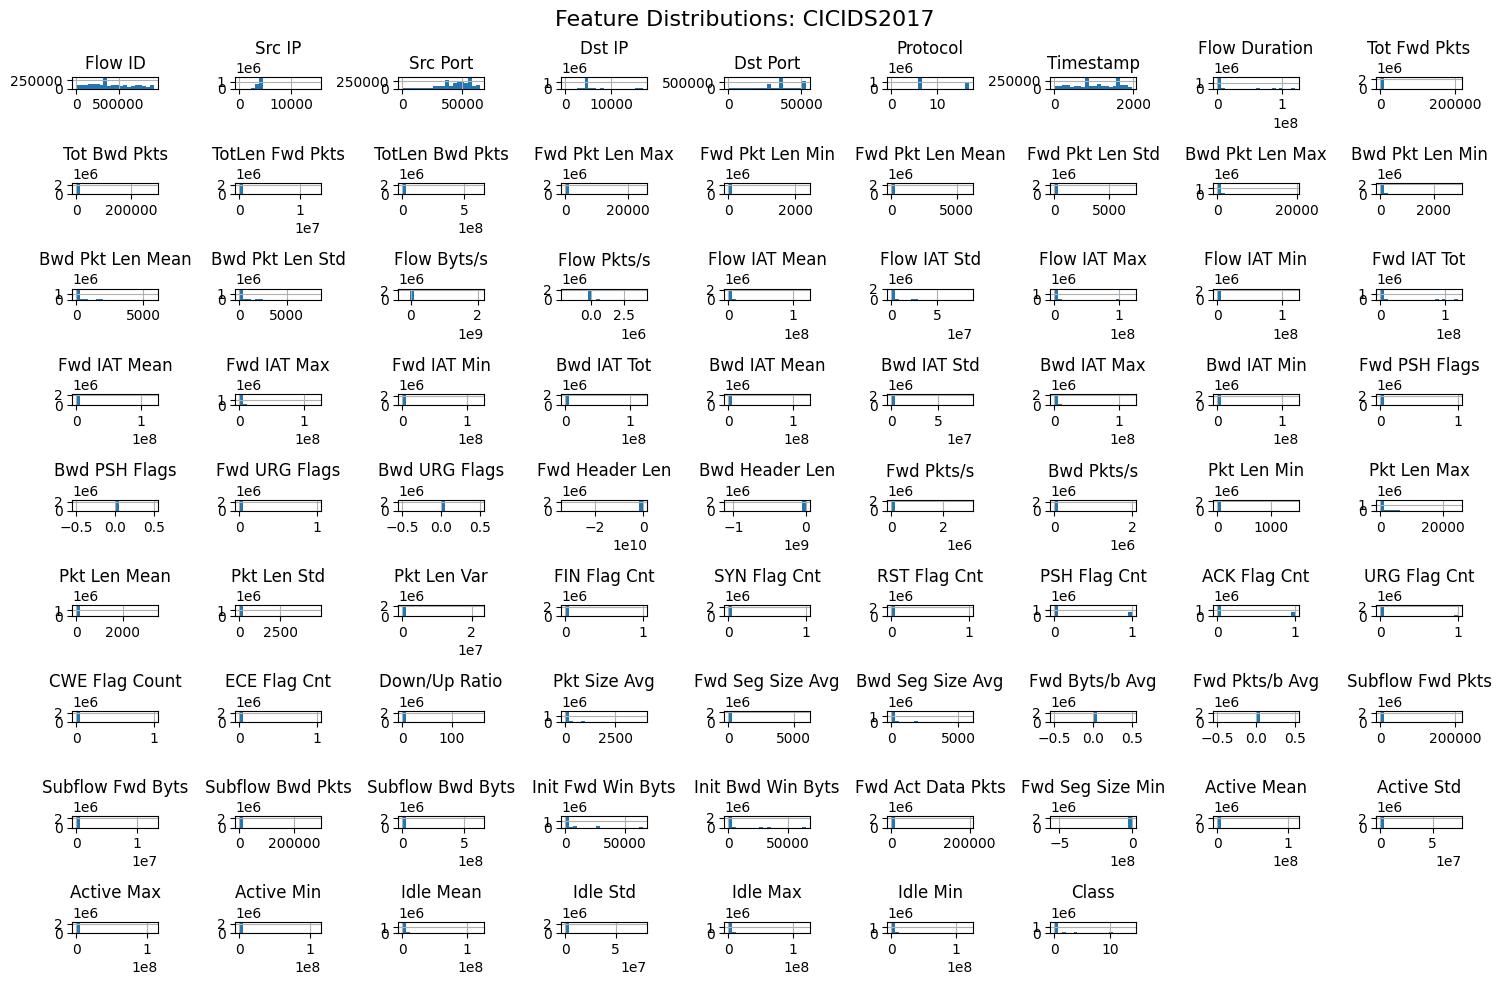

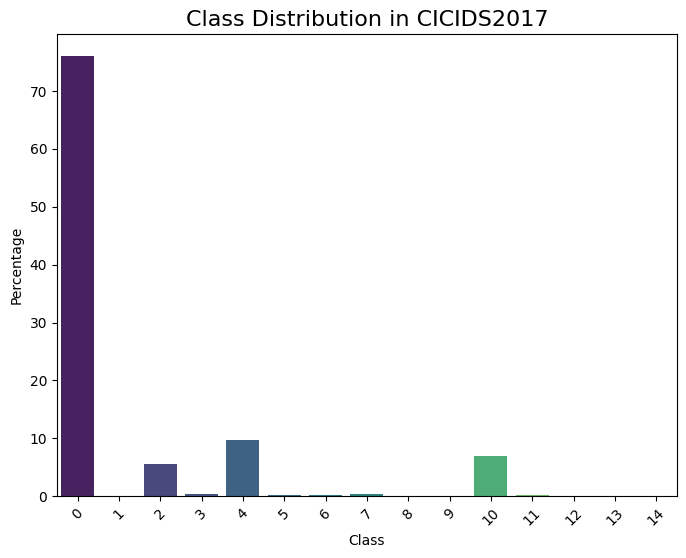

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


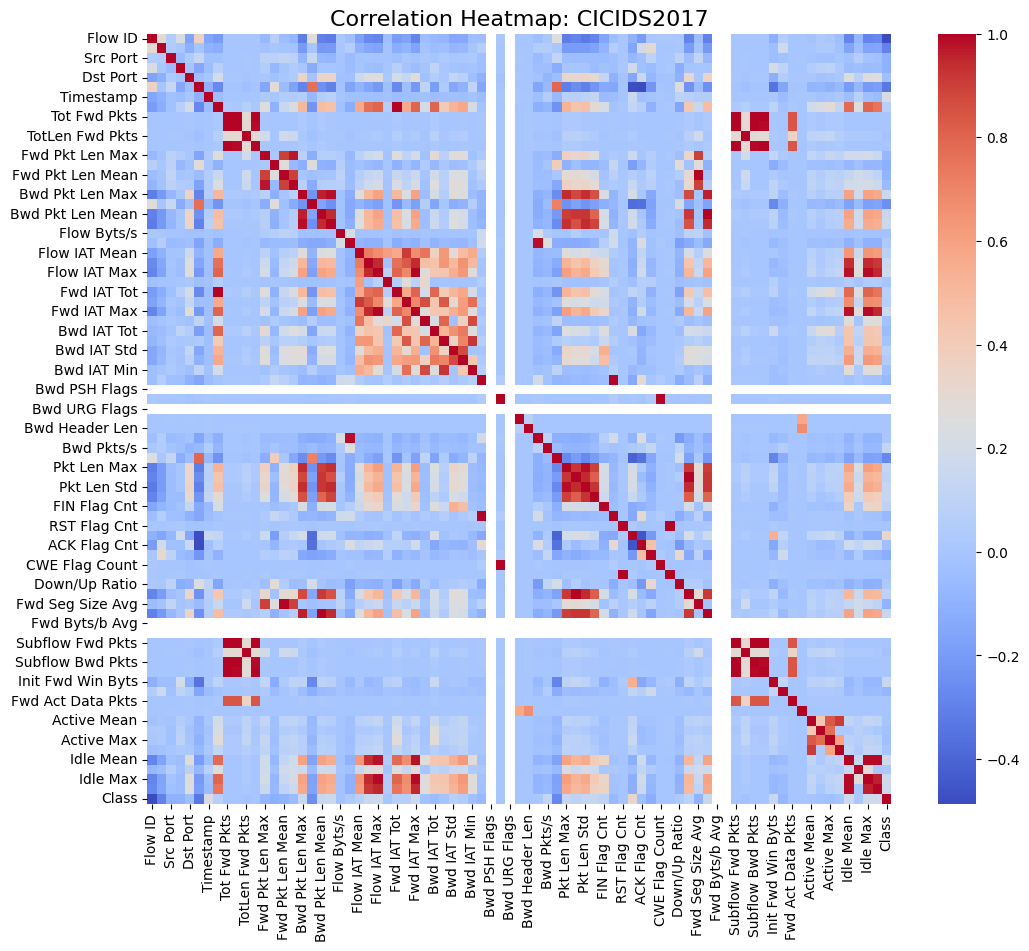

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

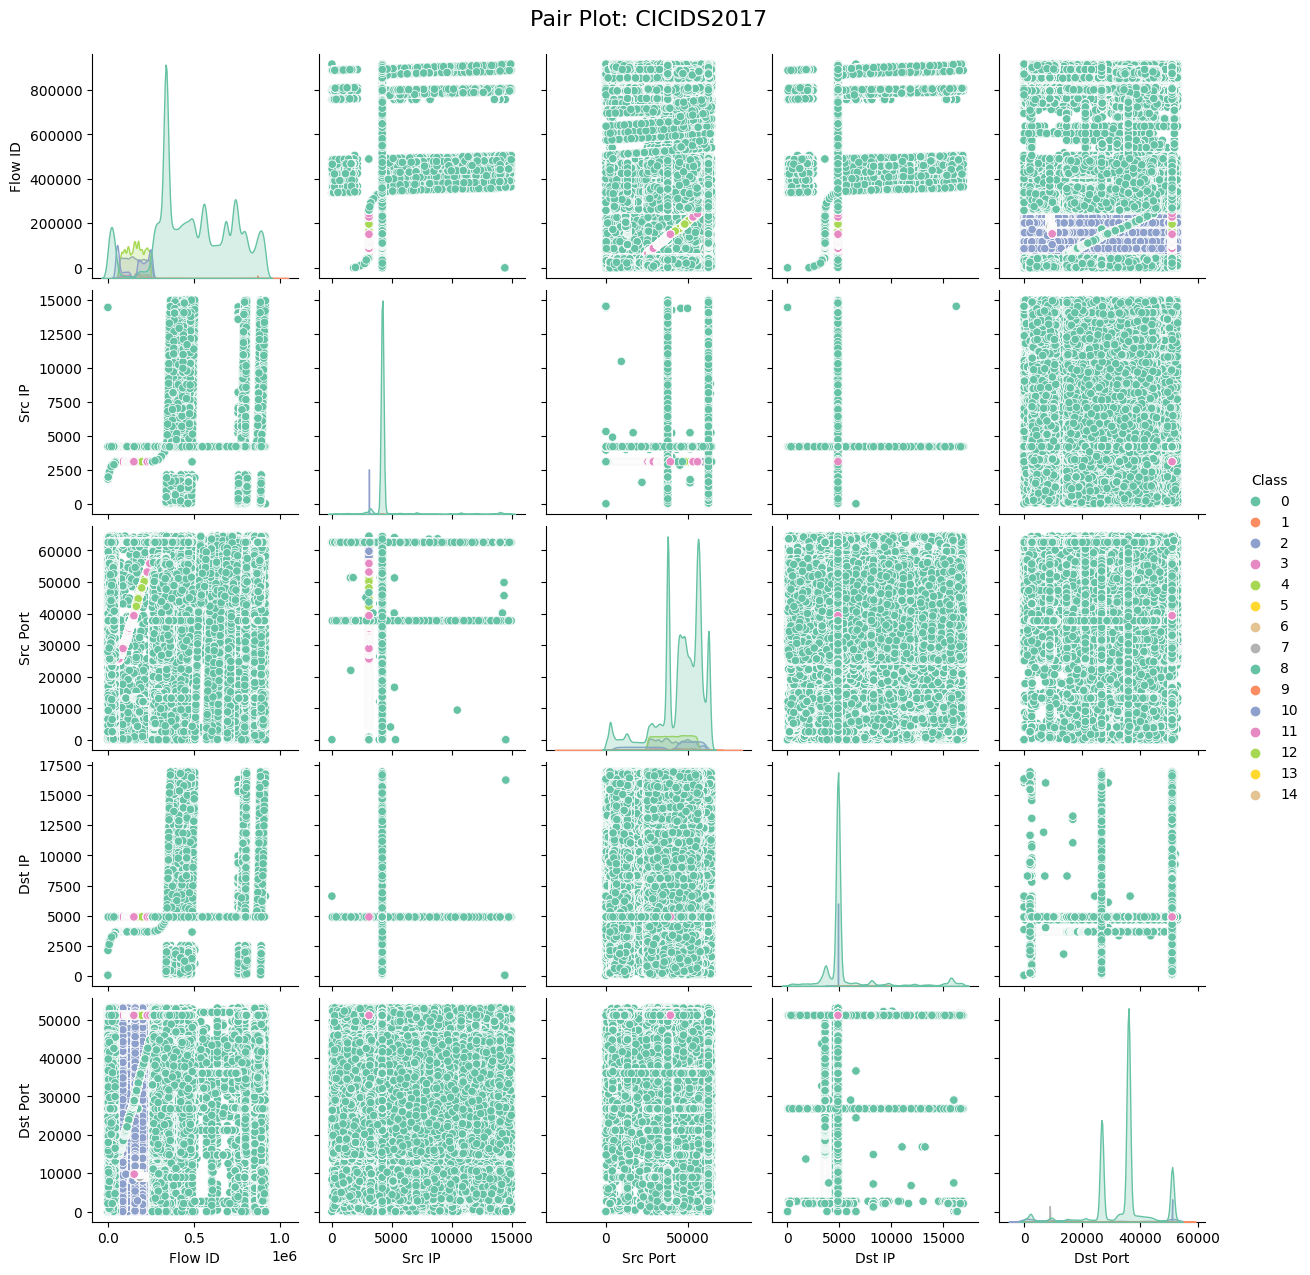

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_dataset(df, dataset_name, target_col):
    """
    Generates insightful figures for EDA.
    """
    # Check if target_col is in the DataFrame
    if target_col not in df.columns:
        raise KeyError(f"Target column '{target_col}' not found in the dataset '{dataset_name}'.")

    print(f"Columns in {dataset_name}: {df.columns}")
    print(f"Target column: {target_col}")

    # Plot distribution of numeric features
    numeric_cols = df.select_dtypes(include=["number"]).columns
    plt.figure(figsize=(15, 8))
    df[numeric_cols].hist(bins=20, figsize=(15, 10))
    plt.suptitle(f"Feature Distributions: {dataset_name}", fontsize=16)
    plt.tight_layout()
    plt.savefig(f"{dataset_name}_feature_distributions.png")
    plt.show()

    # Class distribution
    plt.figure(figsize=(8, 6))
    class_counts = df[target_col].value_counts(normalize=True) * 100  # Convert to percentage
    sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
    plt.title(f"Class Distribution in {dataset_name}", fontsize=16)
    plt.xlabel("Class")
    plt.ylabel("Percentage")
    plt.xticks(rotation=45)
    plt.savefig(f"{dataset_name}_class_distribution.png")
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(12, 10))
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
    plt.title(f"Correlation Heatmap: {dataset_name}", fontsize=16)
    plt.savefig(f"{dataset_name}_correlation_heatmap.png")
    plt.show()

    # Pair plot for a subset of features
    sampled_features = [col for col in numeric_cols if col in df.columns][:5]  # Limit to 5 features
    if target_col not in df.columns:
        raise KeyError(f"Target column '{target_col}' not found in {dataset_name}.")
    sampled_df = df[sampled_features + [target_col]]
    sns.pairplot(sampled_df, hue=target_col, palette="Set2", diag_kind="kde")
    plt.suptitle(f"Pair Plot: {dataset_name}", y=1.02, fontsize=16)
    plt.savefig(f"{dataset_name}_pairplot.png")
    plt.show()


# Process datasets and visualize
for dataset_name, path in datasets.items():
    print(f"\nProcessing dataset: {dataset_name}")
    target_col = target_columns[dataset_name]

    # Preprocess dataset
    df = preprocess_data(path)
    print(f"Shape of {dataset_name}: {df.shape}")
    print(f"Number of unique classes in '{target_col}': {len(df[target_col].unique())}")

    # Visualize dataset
    visualize_dataset(df, dataset_name, target_col)
